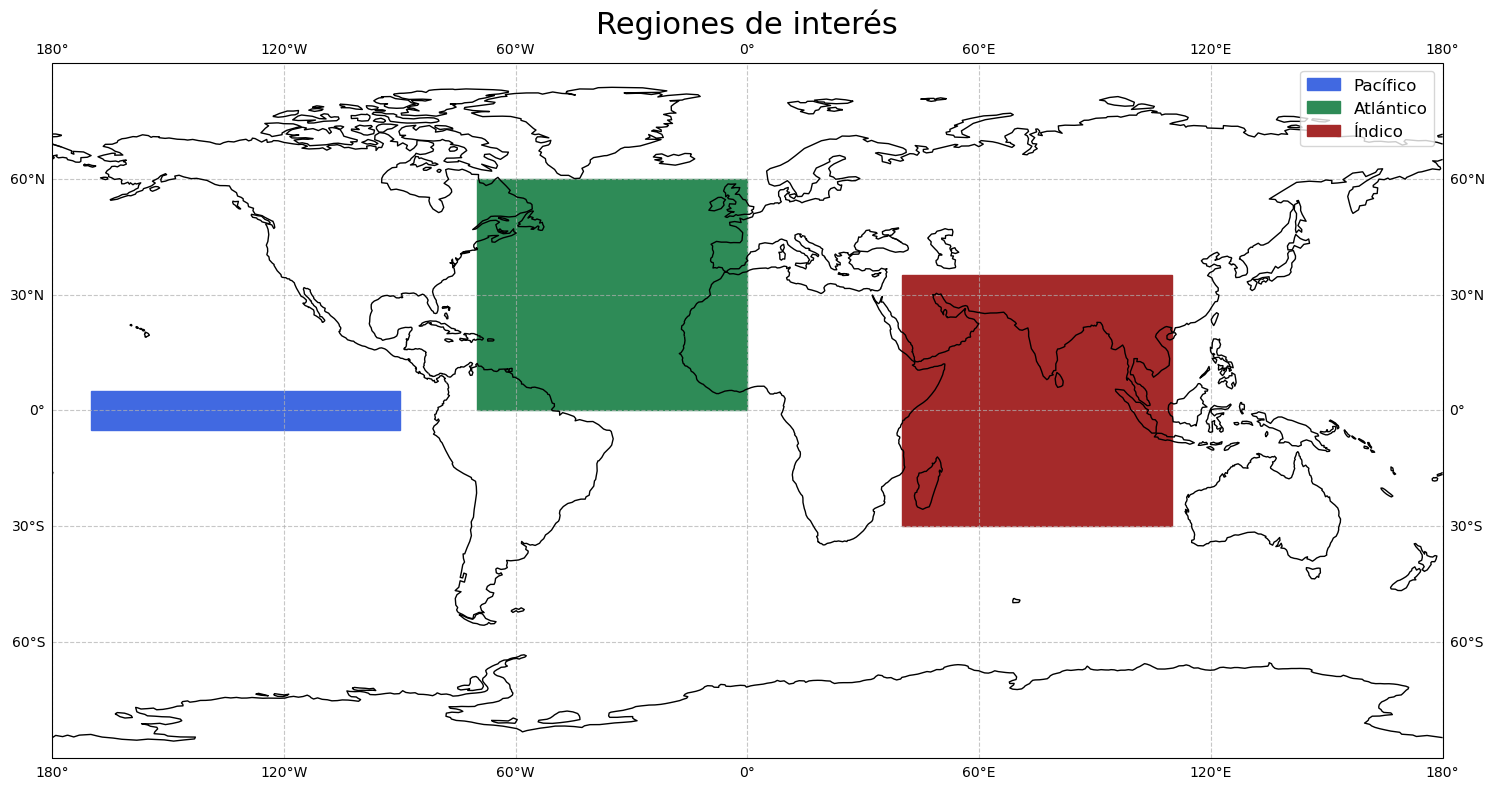

In [2]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib import style
plt.style.use('default') # Estilo general


fig, ax = plt.subplots(figsize=(16, 8), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')

ax.set_global() # added following an answer to my question
#ax.gridlines()
ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)
def pinta_region(lats,lons,color,ax=ax,label=None):
    lat_corners = np.array([lats[0], lats[0],lats[1], lats[1]])
    lon_corners = np.array([ lons[0], lons[1], lons[1], lons[0]])
    poly_corners = np.zeros((len(lat_corners), 2), np.float64)
    poly_corners[:,0] = lon_corners
    poly_corners[:,1] = lat_corners
    poly = mpatches.Polygon(poly_corners, closed=True, ec=color, fill=True, lw=1, fc=color,label=label)#, transform=ccrs.Geodetic())
    ax.add_patch(poly)

ax.set_title('Regiones de interés',size=22)
pinta_region([-5,5],[-170,-90],'royalblue',ax,label='Pacífico')
pinta_region([0,60],[-70,0],'seagreen',ax,label='Atlántico')
pinta_region([-30,35],[40,110],'brown',ax,label='Índico')
ax.legend(prop={'size':12})
plt.tight_layout()
fig.savefig('Regiones.png',dpi=500,facecolor='w')
